# Monday Class

In [1]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 60s 62ms/step - loss: 0.1694 - accuracy: 0.9469
Epoch 2/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0464 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0323 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0188 - accuracy: 0.9942


In [4]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0363 - accuracy: 0.9889


In [5]:
test_loss

0.03629528358578682

In [6]:
test_acc

0.9889000058174133

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
h=cv2.imread("./images.png")
gray=cv2.cvtColor(h,cv2.COLOR_BGR2GRAY)

In [16]:
gray.shape
gray=cv2.resize(gray,(28,28))

In [17]:
h_batch=np.expand_dims(gray,axis=0)

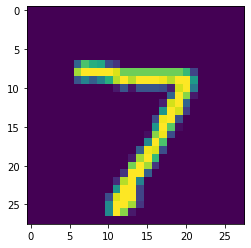

In [18]:
plt.imshow(gray)

In [19]:
labels=["0","1","2","3","4","5","6","7","8","9"]

def visualize_h(test_model,h):
    h_batch=np.expand_dims(h,axis=0)
    print(h_batch.shape)
    conv_h=model.predict(h_batch)
    #print(conv_h)
    predict=np.argmax(conv_h)
    #print(predict)
    print(f"predicted label: {labels[predict]}")
    plt.imshow(h)

(1, 28, 28)
1/1 [==============================] - 0s 182ms/step
predicted label: 7


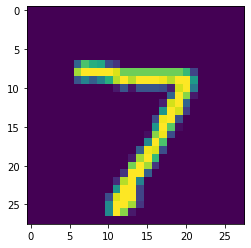

In [20]:
visualize_h(model,gray)